In [1]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle

## In this notebook we are looking for the outliers in the FE simulation data 

In [2]:
### read all the simulation data with different properties
df1 = pd.read_csv("Data/FE_constAng3_29param.csv")

df2 = pd.read_csv("Data/FE_Var_SizeAngle3_29param.csv")

df3 = pd.read_csv("Data/FE_Var_SizeConstAng3_29param.csv")

df4 = pd.read_csv("Data/FE_varAng3_29param.csv")

df5 = pd.read_csv("Data/FE_constAng5_29param.csv")

df6 = pd.read_csv("Data/FE_varAng5_29param.csv")

df7 = pd.read_csv("Data/FE_constAng7_29param.csv")

df8 = pd.read_csv("Data/FE_varAng7_29param.csv")

df9 = pd.read_csv("Data/FE_constAng3_repeat_29param.csv")

df_combined = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8 , df9 
                       ], axis = 0, ignore_index = True)
df_combined.shape

(111, 29)

In [3]:
repeat = pd.read_csv("Data/FE_repeatRound2_29param.csv")

df_total = pd.concat([df_combined, repeat 
                       ], axis = 0, ignore_index = True)

In [4]:
df.keys()

Index(['Number_pieces', 'Length_ratio', 'angle1_9p', 'angle2_9', 'angle3_9p',
       'angle4_9p', 'angle1_25p', 'angle2_25p', 'angle3_25p', 'angle4_25p',
       'angle5_25p', 'angle6_25p', 'angle1_49p', 'angle2_49p', 'angle3_49p',
       'angle4_49p', 'angle5_49p', 'angle6_49p', 'angle7_49p', 'angle8_49p',
       'Safety_factor', 'Oop_deform', 'Tot_contactEngy', 'Elast_strainEngy',
       'Edge_temp', 'Avr_frictForce', 'HeatRate', 'IntEngy', 'FricDissipRate'],
      dtype='object')

In [5]:
import numpy as np
import pandas as pd

### because of small number of observations, we use bootstapping for finding mean and std of the population 
def createBootstrapMeansStd(data):

    numboot = 10000
    n = len(data)
    boot_means = np.zeros(numboot)
    boot_stds = np.zeros(numboot)
    np.random.seed(0)
    for i in range(numboot):
        d = data.sample(n, replace = True)
        boot_means[i] = d.mean()
        boot_stds[i] = np.std(d, ddof=1)
    bootmean = boot_means.mean()
    bootstd = boot_stds.mean()
    return bootmean, bootstd


### detect outliers using the mean of the population
def detect_outlier_one(data_1):

    outliers=[]
    threshold=2.698
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1, ddof=1)
    
    row = -1
    for y in data_1:
        row += 1
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append((y, row))
    return outliers


### detect ourliers using bootstrap mean
def detect_outlier_mean(data_1):
    outliers=[]
    threshold=2.698
    mean_1, std_1 = createBootstrapMeansStd(data_1)
    
    row = -1
    for y in data_1:
        row += 1
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append((y, row))
    return outliers


In [6]:
# MEAN, STD = createBootstrapMeansStd(df_combined.Oop_deform)
# print(MEAN, MEAN.mean(), '\n\n', STD, STD.mean())

In [17]:
outlier_datapoints_1 = detect_outlier_one(df_combined.Safety_factor)
print('Outliers based on Safety_factor: \n',outlier_datapoints_1)

outlier_datapoints_1 = detect_outlier_mean(df_combined.Safety_factor)
print('Outliers based on Safety_factor: \n',outlier_datapoints_1)


for i in range(len(outlier_datapoints_1)):
    display(df_combined.iloc[outlier_datapoints_1[i][1],:20])

Outliers based on Safety_factor: 
 [(0.0106799385628586, 32), (0.2908256213190743, 106)]
Outliers based on Safety_factor: 
 [(0.0106799385628586, 32), (0.2908256213190743, 106)]


Number_pieces     9.0
Length_ratio      0.5
angle1_9p         5.0
angle2_9         25.0
angle3_9p        25.0
angle4_9p        10.0
angle1_25p        0.0
angle2_25p        0.0
angle3_25p        0.0
angle4_25p        0.0
angle5_25p        0.0
angle6_25p        0.0
angle1_49p        0.0
angle2_49p        0.0
angle3_49p        0.0
angle4_49p        0.0
angle5_49p        0.0
angle6_49p        0.0
angle7_49p        0.0
angle8_49p        0.0
Name: 32, dtype: float64

Number_pieces    49.0
Length_ratio      1.0
angle1_9p         0.0
angle2_9          0.0
angle3_9p         0.0
angle4_9p         0.0
angle1_25p        0.0
angle2_25p        0.0
angle3_25p        0.0
angle4_25p        0.0
angle5_25p        0.0
angle6_25p        0.0
angle1_49p       25.0
angle2_49p       20.0
angle3_49p       15.0
angle4_49p       10.0
angle5_49p        5.0
angle6_49p       20.0
angle7_49p        5.0
angle8_49p       25.0
Name: 106, dtype: float64

In [7]:
outlier_datapoints_2 = detect_outlier_one(df_combined.Oop_deform)
print('Outliers based on Oop_deform: \n',outlier_datapoints_2)

outlier_datapoints_2 = detect_outlier_mean(df_combined.Oop_deform)
print('Outliers based on Oop_deform: \n',outlier_datapoints_2)


for i in range(len(outlier_datapoints_2)):
    display(df_combined.iloc[outlier_datapoints_2[i][1],:20])


Outliers based on Oop_deform: 
 [(0.626389545465712, 11), (0.6010057282905894, 14), (0.5855836191538256, 20), (0.5606903128393622, 29)]
Outliers based on Oop_deform: 
 [(0.626389545465712, 11), (0.6010057282905894, 14), (0.5855836191538256, 20), (0.5606903128393622, 29)]


Number_pieces     9.00
Length_ratio      0.75
angle1_9p         5.00
angle2_9         25.00
angle3_9p        15.00
angle4_9p        10.00
angle1_25p        0.00
angle2_25p        0.00
angle3_25p        0.00
angle4_25p        0.00
angle5_25p        0.00
angle6_25p        0.00
angle1_49p        0.00
angle2_49p        0.00
angle3_49p        0.00
angle4_49p        0.00
angle5_49p        0.00
angle6_49p        0.00
angle7_49p        0.00
angle8_49p        0.00
Name: 11, dtype: float64

Number_pieces     9.0
Length_ratio      0.5
angle1_9p         5.0
angle2_9         25.0
angle3_9p        15.0
angle4_9p        10.0
angle1_25p        0.0
angle2_25p        0.0
angle3_25p        0.0
angle4_25p        0.0
angle5_25p        0.0
angle6_25p        0.0
angle1_49p        0.0
angle2_49p        0.0
angle3_49p        0.0
angle4_49p        0.0
angle5_49p        0.0
angle6_49p        0.0
angle7_49p        0.0
angle8_49p        0.0
Name: 14, dtype: float64

Number_pieces     9.0
Length_ratio      0.5
angle1_9p        15.0
angle2_9         10.0
angle3_9p        20.0
angle4_9p         5.0
angle1_25p        0.0
angle2_25p        0.0
angle3_25p        0.0
angle4_25p        0.0
angle5_25p        0.0
angle6_25p        0.0
angle1_49p        0.0
angle2_49p        0.0
angle3_49p        0.0
angle4_49p        0.0
angle5_49p        0.0
angle6_49p        0.0
angle7_49p        0.0
angle8_49p        0.0
Name: 20, dtype: float64

Number_pieces     9.00
Length_ratio      0.75
angle1_9p         5.00
angle2_9         25.00
angle3_9p        25.00
angle4_9p        10.00
angle1_25p        0.00
angle2_25p        0.00
angle3_25p        0.00
angle4_25p        0.00
angle5_25p        0.00
angle6_25p        0.00
angle1_49p        0.00
angle2_49p        0.00
angle3_49p        0.00
angle4_49p        0.00
angle5_49p        0.00
angle6_49p        0.00
angle7_49p        0.00
angle8_49p        0.00
Name: 29, dtype: float64

In [8]:
outlier_datapoints_3 = detect_outlier_one(df_combined.Tot_contactEngy)
print('Outliers based on Tot_contactEngy', outlier_datapoints_3)

outlier_datapoints_3 = detect_outlier_mean(df_combined.Tot_contactEngy)
print('Outliers based on Tot_contactEngy', outlier_datapoints_3)

for i in range(len(outlier_datapoints_3)):
    display(df_combined.iloc[outlier_datapoints_3[i][1],:20])


Outliers based on Tot_contactEngy [(69.72270665792534, 94)]
Outliers based on Tot_contactEngy [(69.72270665792534, 94)]


Number_pieces    49.0
Length_ratio      1.0
angle1_9p         0.0
angle2_9          0.0
angle3_9p         0.0
angle4_9p         0.0
angle1_25p        0.0
angle2_25p        0.0
angle3_25p        0.0
angle4_25p        0.0
angle5_25p        0.0
angle6_25p        0.0
angle1_49p        5.0
angle2_49p        5.0
angle3_49p        5.0
angle4_49p        5.0
angle5_49p        5.0
angle6_49p        5.0
angle7_49p        5.0
angle8_49p        5.0
Name: 94, dtype: float64

In [9]:
outlier_datapoints_4 = detect_outlier_one(df_combined.Elast_strainEngy)
print('Outliers based on Elast_strainEngy', outlier_datapoints_4)

outlier_datapoints_4 = detect_outlier_mean(df_combined.Elast_strainEngy)
print('Outliers based on Elast_strainEngy', outlier_datapoints_4)


for i in range(len(outlier_datapoints_4)):
    display(df_combined.iloc[outlier_datapoints_4[i][1],:20])

Outliers based on Elast_strainEngy [(17.37485532959268, 94)]
Outliers based on Elast_strainEngy [(17.37485532959268, 94)]


Number_pieces    49.0
Length_ratio      1.0
angle1_9p         0.0
angle2_9          0.0
angle3_9p         0.0
angle4_9p         0.0
angle1_25p        0.0
angle2_25p        0.0
angle3_25p        0.0
angle4_25p        0.0
angle5_25p        0.0
angle6_25p        0.0
angle1_49p        5.0
angle2_49p        5.0
angle3_49p        5.0
angle4_49p        5.0
angle5_49p        5.0
angle6_49p        5.0
angle7_49p        5.0
angle8_49p        5.0
Name: 94, dtype: float64

In [10]:
outlier_datapoints_5 = detect_outlier_one(df_combined.Edge_temp)
print('Outliers based on Edge_temp', outlier_datapoints_5)

outlier_datapoints_5 = detect_outlier_mean(df_combined.Edge_temp)
print('Outliers based on Edge_temp', outlier_datapoints_5)


for i in range(len(outlier_datapoints_5)):
    display(df_combined.iloc[outlier_datapoints_5[i][1],:20])

Outliers based on Edge_temp []
Outliers based on Edge_temp []


In [11]:
outlier_datapoints_6 = detect_outlier_one(df_combined.Avr_frictForce)
print('Outliers based on Avr_frictForce', outlier_datapoints_6)

outlier_datapoints_6 = detect_outlier_mean(df_combined.Avr_frictForce)
print('Outliers based on Avr_frictForce', outlier_datapoints_6)

for i in range(len(outlier_datapoints_6)):
    display(df_combined.iloc[outlier_datapoints_6[i][1],:20])

Outliers based on Avr_frictForce [(4753.636701780301, 75), (5242.8637271098105, 78), (4558.19021058742, 91)]
Outliers based on Avr_frictForce [(4753.636701780301, 75), (5242.8637271098105, 78), (4558.19021058742, 91)]


Number_pieces    25.0
Length_ratio      1.0
angle1_9p         0.0
angle2_9          0.0
angle3_9p         0.0
angle4_9p         0.0
angle1_25p       10.0
angle2_25p       10.0
angle3_25p       10.0
angle4_25p       10.0
angle5_25p       10.0
angle6_25p       10.0
angle1_49p        0.0
angle2_49p        0.0
angle3_49p        0.0
angle4_49p        0.0
angle5_49p        0.0
angle6_49p        0.0
angle7_49p        0.0
angle8_49p        0.0
Name: 75, dtype: float64

Number_pieces    25.0
Length_ratio      1.0
angle1_9p         0.0
angle2_9          0.0
angle3_9p         0.0
angle4_9p         0.0
angle1_25p        5.0
angle2_25p        5.0
angle3_25p        5.0
angle4_25p        5.0
angle5_25p        5.0
angle6_25p        5.0
angle1_49p        0.0
angle2_49p        0.0
angle3_49p        0.0
angle4_49p        0.0
angle5_49p        0.0
angle6_49p        0.0
angle7_49p        0.0
angle8_49p        0.0
Name: 78, dtype: float64

Number_pieces    49.0
Length_ratio      1.0
angle1_9p         0.0
angle2_9          0.0
angle3_9p         0.0
angle4_9p         0.0
angle1_25p        0.0
angle2_25p        0.0
angle3_25p        0.0
angle4_25p        0.0
angle5_25p        0.0
angle6_25p        0.0
angle1_49p       20.0
angle2_49p       20.0
angle3_49p       20.0
angle4_49p       20.0
angle5_49p       20.0
angle6_49p       20.0
angle7_49p       20.0
angle8_49p       20.0
Name: 91, dtype: float64

In [12]:
outlier_datapoints_7 = detect_outlier_one(df_combined.HeatRate)
print('Outliers based on HeatRate', outlier_datapoints_7)

outlier_datapoints_7 = detect_outlier_mean(df_combined.HeatRate)
print('Outliers based on HeatRate', outlier_datapoints_7)


for i in range(len(outlier_datapoints_7)):
    display(df_combined.iloc[outlier_datapoints_7[i][1],:20])

Outliers based on HeatRate []
Outliers based on HeatRate []


In [13]:
outlier_datapoints_8 = detect_outlier_one(df_combined.IntEngy)
print('Outliers based on IntEngy', outlier_datapoints_8)

outlier_datapoints_8 = detect_outlier_mean(df_combined.IntEngy)
print('Outliers based on IntEngy', outlier_datapoints_8)


for i in range(len(outlier_datapoints_8)):
    display(df_combined.iloc[outlier_datapoints_8[i][1],:20])

Outliers based on IntEngy []
Outliers based on IntEngy []


In [14]:
outlier_datapoints_9 = detect_outlier_one(df_combined.FricDissipRate)
print('Outliers based on FricDissipRate', outlier_datapoints_9)

outlier_datapoints_9 = detect_outlier_mean(df_combined.FricDissipRate)
print('Outliers based on FricDissipRate', outlier_datapoints_9)


for i in range(len(outlier_datapoints_9)):
    display(df_combined.iloc[outlier_datapoints_9[i][1],:20])
    

Outliers based on FricDissipRate [(4.494122588951239, 51)]
Outliers based on FricDissipRate [(4.494122588951239, 51)]


Number_pieces     9.0
Length_ratio      1.5
angle1_9p        10.0
angle2_9         10.0
angle3_9p        10.0
angle4_9p        10.0
angle1_25p        0.0
angle2_25p        0.0
angle3_25p        0.0
angle4_25p        0.0
angle5_25p        0.0
angle6_25p        0.0
angle1_49p        0.0
angle2_49p        0.0
angle3_49p        0.0
angle4_49p        0.0
angle5_49p        0.0
angle6_49p        0.0
angle7_49p        0.0
angle8_49p        0.0
Name: 51, dtype: float64

## Using boxplot for visualizing the outliers

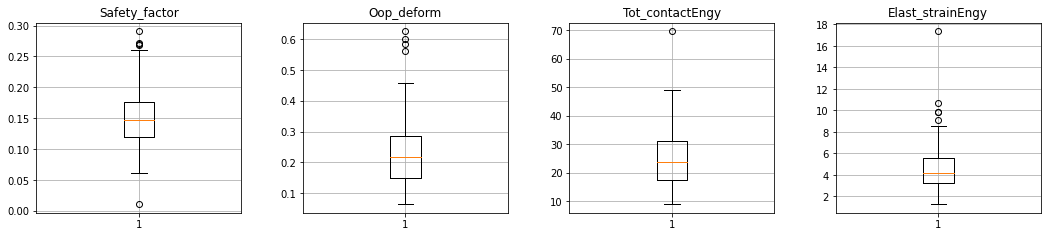

In [8]:
import matplotlib.pyplot as plt 

fig = plt.figure(figsize=(18,3.5))
plt.subplots_adjust(wspace = 0.3)

ax1 = fig.add_subplot(141)
ax2 = fig.add_subplot(142)
ax3 = fig.add_subplot(143)
ax4 = fig.add_subplot(144)

"""'Safety_factor', 'Oop_deform', 'Tot_contactEngy', 'Elast_strainEngy',
       'Edge_temp', 'Avr_frictForce', 'HeatRate', 'IntEngy', 'FricDissipRate'"""

ax1.set_title(label='Safety_factor')
ax1.boxplot(df_combined.Safety_factor)

ax2.set_title(label='Oop_deform')
ax2.boxplot(df_combined.Oop_deform)

ax3.set_title(label='Tot_contactEngy')
ax3.boxplot(df_combined.Tot_contactEngy)

ax4.set_title(label='Elast_strainEngy')
ax4.boxplot(df_combined.Elast_strainEngy)

ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()


# plt.savefig('CleanGraphs/Outliers_01.png',bbox_inches='tight')



plt.show()

In [32]:
def boxplot_outliers(arr):
    # finding the 1st quartile
    q1 = np.quantile(arr, 0.25)

    # finding the 3rd quartile
    q3 = np.quantile(arr, 0.75)
    med = np.median(arr)

    # finding the iqr region
    iqr = q3-q1

    # finding upper and lower whiskers
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    return df_combined.loc[(arr > upper_bound) | (arr < lower_bound)]

In [33]:
boxplot_outliers(df_combined.Safety_factor)

,Number_pieces,Length_ratio,angle1_9p,angle2_9,angle3_9p,angle4_9p,angle1_25p,angle2_25p,angle3_25p,angle4_25p,...,angle8_49p,Safety_factor,Oop_deform,Tot_contactEngy,Elast_strainEngy,Edge_temp,Avr_frictForce,HeatRate,IntEngy,FricDissipRate
32,9.0,0.5,5.0,25.0,25.0,10.0,0.0,0.0,0.0,0.0,...,0.0,0.010680,0.421154,12.095411,3.212994,363.645717,557.605388,146.359942,1831.821302,0.792728
92,49.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.268781,0.115449,48.231387,10.703491,227.439878,3238.018699,126.111487,1408.766874,1.473144
105,49.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.0,0.271077,0.212788,38.406162,6.376872,221.247825,1115.286111,114.759434,1394.638638,2.099661
106,49.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,25.0,0.290826,0.150894,28.406285,4.439363,235.615840,1492.365796,118.799127,1379.093046,1.448861
107,49.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.0,0.270098,0.103289,41.498901,9.896841,238.908498,2050.649369,109.793926,1479.630822,1.223023


In [34]:
boxplot_outliers(df_total.Safety_factor)

,Number_pieces,Length_ratio,angle1_9p,angle2_9,angle3_9p,angle4_9p,angle1_25p,angle2_25p,angle3_25p,angle4_25p,...,angle8_49p,Safety_factor,Oop_deform,Tot_contactEngy,Elast_strainEngy,Edge_temp,Avr_frictForce,HeatRate,IntEngy,FricDissipRate
32,9.0,0.5,5.0,25.0,25.0,10.0,0.0,0.0,0.0,0.0,...,0.0,0.010680,0.421154,12.095411,3.212994,363.645717,557.605388,146.359942,1831.821302,0.792728
106,49.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,25.0,0.290826,0.150894,28.406285,4.439363,235.615840,1492.365796,118.799127,1379.093046,1.448861


In [35]:
boxplot_outliers(df_combined.Oop_deform)

,Number_pieces,Length_ratio,angle1_9p,angle2_9,angle3_9p,angle4_9p,angle1_25p,angle2_25p,angle3_25p,angle4_25p,...,angle8_49p,Safety_factor,Oop_deform,Tot_contactEngy,Elast_strainEngy,Edge_temp,Avr_frictForce,HeatRate,IntEngy,FricDissipRate
11,9.0,0.75,5.0,25.0,15.0,10.0,0.0,0.0,0.0,0.0,...,0.0,0.078262,0.626390,16.570447,3.850948,347.030237,700.386641,124.444290,1829.752644,0.921639
14,9.0,0.50,5.0,25.0,15.0,10.0,0.0,0.0,0.0,0.0,...,0.0,0.126950,0.601006,14.481828,3.437575,362.008359,688.256087,140.577779,1922.289899,1.105336
20,9.0,0.50,15.0,10.0,20.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.112809,0.585584,16.216532,3.480146,372.114679,905.391257,136.326842,1920.860943,1.294554
29,9.0,0.75,5.0,25.0,25.0,10.0,0.0,0.0,0.0,0.0,...,0.0,0.123713,0.560690,16.557375,3.624650,350.906790,585.845669,139.150504,1797.863806,0.791861


In [36]:
boxplot_outliers(df_total.Oop_deform)

,Number_pieces,Length_ratio,angle1_9p,angle2_9,angle3_9p,angle4_9p,angle1_25p,angle2_25p,angle3_25p,angle4_25p,...,angle8_49p,Safety_factor,Oop_deform,Tot_contactEngy,Elast_strainEngy,Edge_temp,Avr_frictForce,HeatRate,IntEngy,FricDissipRate
11,9.0,0.75,5.0,25.0,15.0,10.0,0.0,0.0,0.0,0.0,...,0.0,0.078262,0.626390,16.570447,3.850948,347.030237,700.386641,124.444290,1829.752644,0.921639
14,9.0,0.50,5.0,25.0,15.0,10.0,0.0,0.0,0.0,0.0,...,0.0,0.126950,0.601006,14.481828,3.437575,362.008359,688.256087,140.577779,1922.289899,1.105336
20,9.0,0.50,15.0,10.0,20.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.112809,0.585584,16.216532,3.480146,372.114679,905.391257,136.326842,1920.860943,1.294554
29,9.0,0.75,5.0,25.0,25.0,10.0,0.0,0.0,0.0,0.0,...,0.0,0.123713,0.560690,16.557375,3.624650,350.906790,585.845669,139.150504,1797.863806,0.791861


In [37]:
boxplot_outliers(df_combined.Tot_contactEngy)

,Number_pieces,Length_ratio,angle1_9p,angle2_9,angle3_9p,angle4_9p,angle1_25p,angle2_25p,angle3_25p,angle4_25p,...,angle8_49p,Safety_factor,Oop_deform,Tot_contactEngy,Elast_strainEngy,Edge_temp,Avr_frictForce,HeatRate,IntEngy,FricDissipRate
94,49.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.246687,0.071311,69.722707,17.374855,252.18954,3510.091653,111.012411,1558.971232,0.761163


In [38]:
boxplot_outliers(df_total.Tot_contactEngy)

,Number_pieces,Length_ratio,angle1_9p,angle2_9,angle3_9p,angle4_9p,angle1_25p,angle2_25p,angle3_25p,angle4_25p,...,angle8_49p,Safety_factor,Oop_deform,Tot_contactEngy,Elast_strainEngy,Edge_temp,Avr_frictForce,HeatRate,IntEngy,FricDissipRate
94,49.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.246687,0.071311,69.722707,17.374855,252.18954,3510.091653,111.012411,1558.971232,0.761163


In [39]:
boxplot_outliers(df_combined.Elast_strainEngy)

,Number_pieces,Length_ratio,angle1_9p,angle2_9,angle3_9p,angle4_9p,angle1_25p,angle2_25p,angle3_25p,angle4_25p,...,angle8_49p,Safety_factor,Oop_deform,Tot_contactEngy,Elast_strainEngy,Edge_temp,Avr_frictForce,HeatRate,IntEngy,FricDissipRate
78,25.0,1.0,0.0,0.0,0.0,0.0,5.0,5.0,5.0,5.0,...,0.0,0.215965,0.072402,48.908318,9.845241,304.344013,5242.863727,121.682184,1786.565872,0.747337
92,49.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.268781,0.115449,48.231387,10.703491,227.439878,3238.018699,126.111487,1408.766874,1.473144
93,49.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.0,0.259697,0.086255,40.411052,9.098184,238.417429,3323.659312,120.289490,1470.360137,1.374585
94,49.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.246687,0.071311,69.722707,17.374855,252.189540,3510.091653,111.012411,1558.971232,0.761163
107,49.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.0,0.270098,0.103289,41.498901,9.896841,238.908498,2050.649369,109.793926,1479.630822,1.223023


In [40]:
boxplot_outliers(df_total.Elast_strainEngy)

,Number_pieces,Length_ratio,angle1_9p,angle2_9,angle3_9p,angle4_9p,angle1_25p,angle2_25p,angle3_25p,angle4_25p,...,angle8_49p,Safety_factor,Oop_deform,Tot_contactEngy,Elast_strainEngy,Edge_temp,Avr_frictForce,HeatRate,IntEngy,FricDissipRate
94,49.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.246687,0.071311,69.722707,17.374855,252.18954,3510.091653,111.012411,1558.971232,0.761163


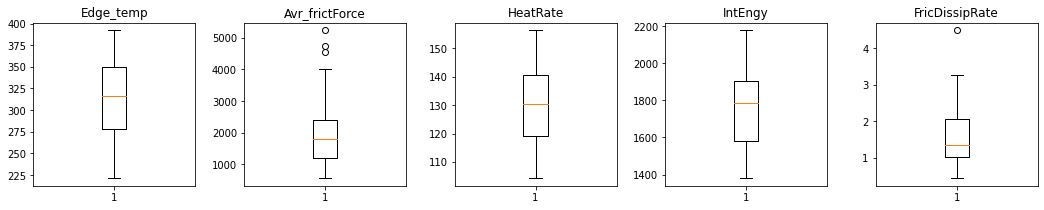

In [41]:
fig = plt.figure(figsize=(18,3))
plt.subplots_adjust(wspace = 0.3)

ax1 = fig.add_subplot(151)
ax2 = fig.add_subplot(152)
ax3 = fig.add_subplot(153)
ax4 = fig.add_subplot(154)
ax5 = fig.add_subplot(155)


ax1.set_title(label='Edge_temp')
ax1.boxplot(df_combined.Edge_temp)

ax2.set_title(label='Avr_frictForce')
ax2.boxplot(df_combined.Avr_frictForce)

ax3.set_title(label='HeatRate')
ax3.boxplot(df_combined.HeatRate)

ax4.set_title(label='IntEngy')
ax4.boxplot(df_combined.IntEngy)

ax5.set_title(label='FricDissipRate')
ax5.boxplot(df_combined.FricDissipRate)
plt.savefig('CleanGraphs/Outliers_02.png',bbox_inches='tight')


plt.show()

In [42]:
boxplot_outliers(df_combined.Avr_frictForce)

,Number_pieces,Length_ratio,angle1_9p,angle2_9,angle3_9p,angle4_9p,angle1_25p,angle2_25p,angle3_25p,angle4_25p,...,angle8_49p,Safety_factor,Oop_deform,Tot_contactEngy,Elast_strainEngy,Edge_temp,Avr_frictForce,HeatRate,IntEngy,FricDissipRate
75,25.0,1.0,0.0,0.0,0.0,0.0,10.0,10.0,10.0,10.0,...,0.0,0.188957,0.099219,40.502037,7.640411,300.878396,4753.636702,121.509130,1767.479431,1.581790
78,25.0,1.0,0.0,0.0,0.0,0.0,5.0,5.0,5.0,5.0,...,0.0,0.215965,0.072402,48.908318,9.845241,304.344013,5242.863727,121.682184,1786.565872,0.747337
91,49.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.0,0.225385,0.069679,30.992188,7.269596,246.063226,4558.190211,108.748657,1503.266958,1.164482


In [43]:
boxplot_outliers(df_total.Avr_frictForce)

,Number_pieces,Length_ratio,angle1_9p,angle2_9,angle3_9p,angle4_9p,angle1_25p,angle2_25p,angle3_25p,angle4_25p,...,angle8_49p,Safety_factor,Oop_deform,Tot_contactEngy,Elast_strainEngy,Edge_temp,Avr_frictForce,HeatRate,IntEngy,FricDissipRate
75,25.0,1.0,0.0,0.0,0.0,0.0,10.0,10.0,10.0,10.0,...,0.0,0.188957,0.099219,40.502037,7.640411,300.878396,4753.636702,121.509130,1767.479431,1.581790
78,25.0,1.0,0.0,0.0,0.0,0.0,5.0,5.0,5.0,5.0,...,0.0,0.215965,0.072402,48.908318,9.845241,304.344013,5242.863727,121.682184,1786.565872,0.747337
91,49.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.0,0.225385,0.069679,30.992188,7.269596,246.063226,4558.190211,108.748657,1503.266958,1.164482


In [16]:
boxplot_outliers(df_combined.FricDissipRate)

,Number_pieces,Length_ratio,angle1_9p,angle2_9,angle3_9p,angle4_9p,angle1_25p,angle2_25p,angle3_25p,angle4_25p,...,angle8_49p,Safety_factor,Oop_deform,Tot_contactEngy,Elast_strainEngy,Edge_temp,Avr_frictForce,HeatRate,IntEngy,FricDissipRate
51,9.0,1.5,10.0,10.0,10.0,10.0,0.0,0.0,0.0,0.0,...,0.0,0.110731,0.245572,25.669459,4.041329,356.207883,2098.351702,134.894168,2000.705015,4.494123


In [44]:
boxplot_outliers(df_total.FricDissipRate)

,Number_pieces,Length_ratio,angle1_9p,angle2_9,angle3_9p,angle4_9p,angle1_25p,angle2_25p,angle3_25p,angle4_25p,...,angle8_49p,Safety_factor,Oop_deform,Tot_contactEngy,Elast_strainEngy,Edge_temp,Avr_frictForce,HeatRate,IntEngy,FricDissipRate
51,9.0,1.5,10.0,10.0,10.0,10.0,0.0,0.0,0.0,0.0,...,0.0,0.110731,0.245572,25.669459,4.041329,356.207883,2098.351702,134.894168,2000.705015,4.494123


In [45]:
boxplot_outliers(df_total.HeatRate)

,Number_pieces,Length_ratio,angle1_9p,angle2_9,angle3_9p,angle4_9p,angle1_25p,angle2_25p,angle3_25p,angle4_25p,...,angle8_49p,Safety_factor,Oop_deform,Tot_contactEngy,Elast_strainEngy,Edge_temp,Avr_frictForce,HeatRate,IntEngy,FricDissipRate


In [46]:
boxplot_outliers(df_total.IntEngy)

,Number_pieces,Length_ratio,angle1_9p,angle2_9,angle3_9p,angle4_9p,angle1_25p,angle2_25p,angle3_25p,angle4_25p,...,angle8_49p,Safety_factor,Oop_deform,Tot_contactEngy,Elast_strainEngy,Edge_temp,Avr_frictForce,HeatRate,IntEngy,FricDissipRate


In [28]:
### list the index of outliers to make a single file of the outliers
Box_outliers = [32, 92, 105, 106, 107, 11, 14, 20, 29, 94, 78, 93, 75, 91, 51]

# for i in Box_outliers:
outliers = (df_combined.iloc[Box_outliers, :20])
outliers_param = (df_combined.iloc[Box_outliers, :])
outliers_param.to_csv(r'Data/FE_outliers_round1_29param.csv', header=True, index = False)



In [135]:
outliers.loc[(outliers.Number_pieces == 9.0)].iloc[:,:6]

,Number_pieces,Length_ratio,angle1_9p,angle2_9,angle3_9p,angle4_9p
32,9.0,0.50,5.0,25.0,25.0,10.0
11,9.0,0.75,5.0,25.0,15.0,10.0
14,9.0,0.50,5.0,25.0,15.0,10.0
20,9.0,0.50,15.0,10.0,20.0,5.0
29,9.0,0.75,5.0,25.0,25.0,10.0
51,9.0,1.50,10.0,10.0,10.0,10.0


In [141]:
outliers.loc[(outliers.Number_pieces == 25.0)].drop(outliers.iloc[:,2:6], axis = 'columns').drop(outliers.iloc[:,12:], axis = 'columns')

,Number_pieces,Length_ratio,angle1_25p,angle2_25p,angle3_25p,angle4_25p,angle5_25p,angle6_25p
78,25.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0
75,25.0,1.0,10.0,10.0,10.0,10.0,10.0,10.0


In [144]:
outliers.loc[(outliers.Number_pieces == 49.0)].drop(outliers.iloc[:,2:12], axis = 'columns')

,Number_pieces,Length_ratio,angle1_49p,angle2_49p,angle3_49p,angle4_49p,angle5_49p,angle6_49p,angle7_49p,angle8_49p
92,49.0,1.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
105,49.0,1.0,15.0,10.0,15.0,10.0,20.0,5.0,5.0,15.0
106,49.0,1.0,25.0,20.0,15.0,10.0,5.0,20.0,5.0,25.0
107,49.0,1.0,15.0,10.0,20.0,5.0,10.0,15.0,25.0,15.0
94,49.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
93,49.0,1.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0
91,49.0,1.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0


In [19]:
outliers

,Number_pieces,Length_ratio,angle1_9p,angle2_9,angle3_9p,angle4_9p,angle1_25p,angle2_25p,angle3_25p,angle4_25p,angle5_25p,angle6_25p,angle1_49p,angle2_49p,angle3_49p,angle4_49p,angle5_49p,angle6_49p,angle7_49p,angle8_49p
32,9.0,0.50,5.0,25.0,25.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92,49.0,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
105,49.0,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,10.0,15.0,10.0,20.0,5.0,5.0,15.0
106,49.0,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,20.0,15.0,10.0,5.0,20.0,5.0,25.0
107,49.0,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,10.0,20.0,5.0,10.0,15.0,25.0,15.0
11,9.0,0.75,5.0,25.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,9.0,0.50,5.0,25.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,9.0,0.50,15.0,10.0,20.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,9.0,0.75,5.0,25.0,25.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94,49.0,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0


In [20]:
repeat = pd.read_csv("Data/FE_repeatRound2_29param.csv")
repeat

,Number_pieces,Length_ratio,angle1_9p,angle2_9,angle3_9p,angle4_9p,angle1_25p,angle2_25p,angle3_25p,angle4_25p,...,angle8_49p,Safety_factor,Oop_deform,Tot_contactEngy,Elast_strainEngy,Edge_temp,Avr_frictForce,HeatRate,IntEngy,FricDissipRate
0,9.0,0.50,15.0,10.0,20.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.115181,0.574759,15.567815,3.437159,364.646971,894.781342,140.898050,1877.763458,1.294908
1,9.0,0.50,5.0,25.0,15.0,10.0,0.0,0.0,0.0,0.0,...,0.0,0.125769,0.589148,15.149677,3.461281,363.813816,569.688368,149.999491,1923.870465,0.894528
2,9.0,0.50,5.0,25.0,25.0,10.0,0.0,0.0,0.0,0.0,...,0.0,0.136122,0.483060,12.818734,3.255732,373.688951,522.473970,142.629316,1883.730232,0.551914
3,9.0,0.75,5.0,25.0,15.0,10.0,0.0,0.0,0.0,0.0,...,0.0,0.076929,0.576197,16.504884,3.883171,346.425845,778.112680,141.640967,1823.815277,0.772215
4,9.0,1.50,10.0,10.0,10.0,10.0,0.0,0.0,0.0,0.0,...,0.0,0.111128,0.245056,25.537352,3.942088,354.913662,2413.281672,136.319917,1987.214404,4.202059
5,9.0,0.75,5.0,25.0,25.0,10.0,0.0,0.0,0.0,0.0,...,0.0,0.045105,0.534048,16.278838,3.548537,345.206161,618.258696,140.769660,1762.400330,1.001640
6,25.0,1.00,0.0,0.0,0.0,0.0,10.0,10.0,10.0,10.0,...,0.0,0.188957,0.099219,40.502037,7.640411,300.878396,4753.636705,121.509130,1767.479431,1.581790
7,25.0,1.00,0.0,0.0,0.0,0.0,5.0,5.0,5.0,5.0,...,0.0,0.215965,0.072402,48.908318,9.845241,304.344013,5242.863724,121.682184,1786.565872,0.747337
8,49.0,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.0,0.159859,0.200228,31.967406,6.660236,225.139001,2397.466034,121.373440,1417.062488,3.382402
9,49.0,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.0,0.278332,0.104122,38.630138,9.322224,230.893564,1823.820027,109.297988,1430.658414,1.174989


## excluding some data points

In [20]:
### read all the simulation data with different properties
df1 = pd.read_csv("Data/FE_constAng3_29param.csv")

df2 = pd.read_csv("Data/FE_Var_SizeAngle3_29param.csv")

df3 = pd.read_csv("Data/FE_Var_SizeConstAng3_29param.csv")

df4 = pd.read_csv("Data/FE_varAng3_29param.csv")

df5 = pd.read_csv("Data/FE_constAng5_29param.csv")

df6 = pd.read_csv("Data/FE_varAng5_29param.csv")

df7 = pd.read_csv("Data/FE_constAng7_29param.csv")

df8 = pd.read_csv("Data/FE_varAng7_29param.csv")

df9 = pd.read_csv("Data/FE_constAng3_repeat_29param.csv")

df_combined = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8 , df9 
                       ], axis = 0, ignore_index = True)
df_combined.shape

(111, 29)

In [6]:
df_combined.loc[(df_combined.Safety_factor < 0.015)]

,Number_pieces,Length_ratio,angle1_9p,angle2_9,angle3_9p,angle4_9p,angle1_25p,angle2_25p,angle3_25p,angle4_25p,...,angle8_49p,Safety_factor,Oop_deform,Tot_contactEngy,Elast_strainEngy,Edge_temp,Avr_frictForce,HeatRate,IntEngy,FricDissipRate
32,9.0,0.5,5.0,25.0,25.0,10.0,0.0,0.0,0.0,0.0,...,0.0,0.01068,0.421154,12.095411,3.212994,363.645717,557.605388,146.359942,1831.821302,0.792728


In [7]:
df_combined.loc[(df_combined.FricDissipRate > 4)]

,Number_pieces,Length_ratio,angle1_9p,angle2_9,angle3_9p,angle4_9p,angle1_25p,angle2_25p,angle3_25p,angle4_25p,...,angle8_49p,Safety_factor,Oop_deform,Tot_contactEngy,Elast_strainEngy,Edge_temp,Avr_frictForce,HeatRate,IntEngy,FricDissipRate
51,9.0,1.5,10.0,10.0,10.0,10.0,0.0,0.0,0.0,0.0,...,0.0,0.110731,0.245572,25.669459,4.041329,356.207883,2098.351702,134.894168,2000.705015,4.494123


In [10]:
df_combined.loc[(df_combined.Tot_contactEngy > 50)].drop(df_combined.iloc[:,2:12], axis = 'columns')

,Number_pieces,Length_ratio,angle1_49p,angle2_49p,angle3_49p,angle4_49p,angle5_49p,angle6_49p,angle7_49p,angle8_49p,Safety_factor,Oop_deform,Tot_contactEngy,Elast_strainEngy,Edge_temp,Avr_frictForce,HeatRate,IntEngy,FricDissipRate
94,49.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,0.246687,0.071311,69.722707,17.374855,252.18954,3510.091653,111.012411,1558.971232,0.761163


In [11]:
df_combined.loc[(df_combined.Elast_strainEngy > 15)].drop(df_combined.iloc[:,2:12], axis = 'columns')

,Number_pieces,Length_ratio,angle1_49p,angle2_49p,angle3_49p,angle4_49p,angle5_49p,angle6_49p,angle7_49p,angle8_49p,Safety_factor,Oop_deform,Tot_contactEngy,Elast_strainEngy,Edge_temp,Avr_frictForce,HeatRate,IntEngy,FricDissipRate
94,49.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,0.246687,0.071311,69.722707,17.374855,252.18954,3510.091653,111.012411,1558.971232,0.761163


In [21]:
# df_combined.drop(df_combined.iloc[32,:])

df_filtered = df_combined.drop([32, 51, 94], axis = 0)
df = df_filtered.reset_index(drop=True)
df.to_csv(r'Data/FE_filtered_29param.csv', header=True, index = False)
